In [2]:
import math
import random
import time
from math import exp

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from numpy import *
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler

from Bayesneuralnet_regcls import MCMC, Network, scikit_linear_mod
from convergence_test import gelman_rubin

In [3]:
def squared_error(prediction, actual):
    return (
        np.sqrt(np.sum(np.square(prediction - actual)) / prediction.shape[0])
    ) 

In [4]:
def accuracy(prediction, actual):
    count = 0
    for i in range(prediction.shape[0]):
        if prediction[i] == actual[i]:
            count += 1
    return 100 * count/prediction.shape[0]

# Lazer

In [4]:
name = "Lazer"
traindata = np.loadtxt("data/Lazer/train.txt")
testdata = np.loadtxt("data/Lazer/test.txt") 

pos_run1 = np.loadtxt('result/' + name + '/pos_w_0.txt')  
pos_run2 = np.loadtxt('result/' + name + '/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/' + name + '/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/' + name + '/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/' + name + '/pos_w_4.txt') 

In [5]:
pos_weights = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

 0.000584,  0.00168,  0.00232, 0.035,  0.321
0.09919801439407444 1.8650231137598048 3.1706419633986305 6.269176882441543 13.19863484833261


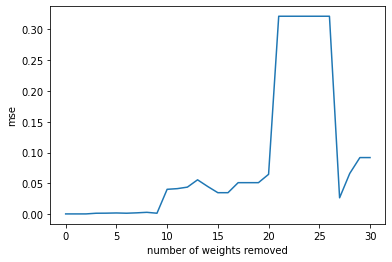

 0.000796,  0.00253,  0.00329, 0.0778,  0.0847
1.0180810256197776 2.2549587695211 5.358561685253409 7.9624531930878995 11.563666225933723


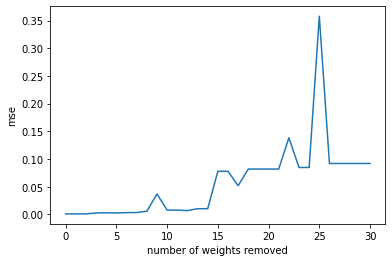

 0.000721,  0.00106,  0.00403, 0.00793,  0.611
0.006095595618580743 1.963892502650362 3.0032784563652357 5.719905902009607 15.612698021554609


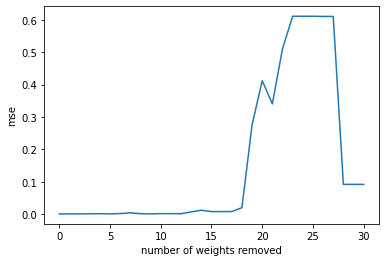

 0.000521,  0.000535,  0.00189, 0.00627,  0.0269
0.03546268263492077 0.8743866165944923 1.5771219031249808 5.435740709030133 13.743313002408943


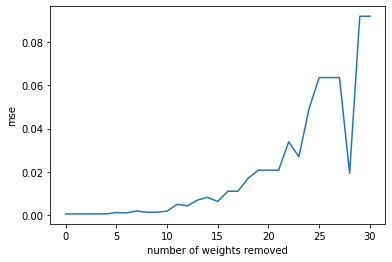

 0.000647,  0.000694,  0.0158, 0.0105,  0.00423
0.05640732322227876 1.2162216050647845 3.411984619914784 8.331873146932569 12.551786528467748


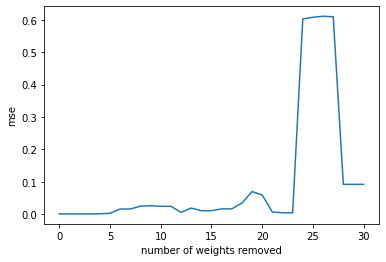

<Figure size 432x288 with 0 Axes>

In [14]:
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
        
#     fig, ax1 = plt.subplots()

#     ax1.set_xlabel('number of weights removed')
#     ax1.set_ylabel('mse')
#     ax1.plot(mse_list, color = 'blue')

#     ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#     ax2.set_ylabel('signal to noise ratio')  
#     ax2.plot(np.sort(signal_to_noise), color = 'red')

#     fig.tight_layout()  # otherwise the right y-label is slightly clipped
#     plt.show()
#     plt.clf()

    print(f"{mse_list[0] : .3g}, {mse_list[int(mse_list.shape[0] * 0.1)] : .3g}, {mse_list[int(mse_list.shape[0] * 0.25)] : .3g},{mse_list[int(mse_list.shape[0] * 0.5)] : .3g}, {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
        
        
    plt.plot(mse_list)
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    plt.show()
    plt.clf()

signal to noise: 
 0.0222 &  0.0356 &  0.0286 &  0.112 &  0.262
0.05541415028078866 1.437337698658067 3.305333210529958 7.953822201381629 17.03166278117169
signal plus noise: 
 0.0222 &  0.0272 &  0.0977 &  0.182 &  0.263
0.23249889965887827 0.37027279307978833 0.7337119881690481 1.5021649053518211 3.288226320979782


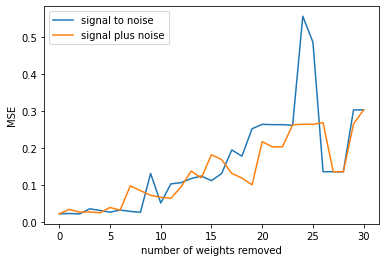

signal to noise: 
 0.0282 &  0.0503 &  0.0574 &  0.279 &  0.291
1.0180810256197776 2.2549587695211 5.358561685253409 7.9624531930878995 11.563666225933723
signal plus noise: 
 0.0282 &  0.0538 &  0.0964 &  0.202 &  0.291
0.18777791493758775 0.8587990970320174 1.492578394439136 1.9297009503519464 3.0446474384492723


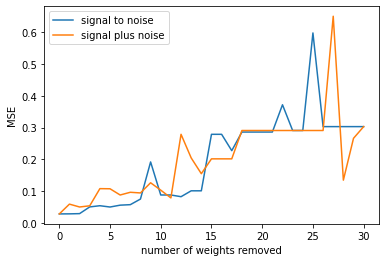

signal to noise: 
 0.0268 &  0.0325 &  0.0635 &  0.089 &  0.782
0.006095595618580743 1.963892502650362 3.0032784563652357 5.719905902009607 15.612698021554609
signal plus noise: 
 0.0259 &  0.043 &  0.0612 &  0.0618 &  0.508
0.2005595638381265 0.45628726104705175 1.0198979541614108 2.1464714695066203 4.33730509702858


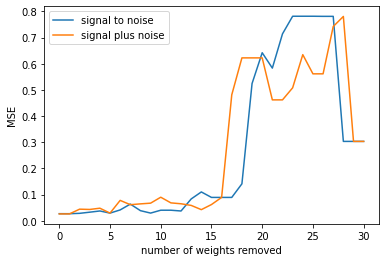

signal to noise: 
 0.0228 &  0.0231 &  0.0435 &  0.0792 &  0.164
0.03546268263492077 0.8743866165944923 1.5771219031249808 5.435740709030133 13.743313002408943
signal plus noise: 
 0.0222 &  0.0218 &  0.0353 &  0.0792 &  0.152
0.1419343301246111 0.3674692389661961 0.5146313891772543 1.3650682256676425 2.5225647208411885


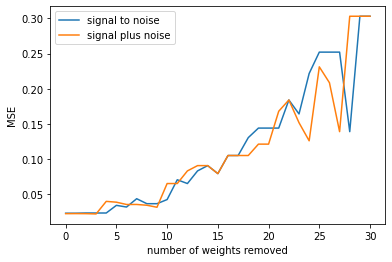

signal to noise: 
 0.0254 &  0.0263 &  0.126 &  0.103 &  0.065
0.05640732322227876 1.2162216050647845 3.411984619914784 8.331873146932569 12.551786528467748
signal plus noise: 
 0.0262 &  0.0263 &  0.0911 &  0.141 &  0.065
0.07077345907387779 0.34135478224074534 1.109316051480014 2.0846408623525376 3.1961646163540554


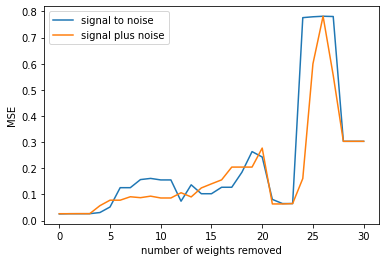

<Figure size 432x288 with 0 Axes>

In [7]:
def squared_error(prediction, actual):
    return (
        np.sqrt(np.sum(np.square(prediction - actual)) / prediction.shape[0])
    ) 
    
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])
    signal_plus_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
        signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    mse_list_spn = np.empty(signal_plus_noise.shape[0])
    
    sorted_index = np.argsort(signal_to_noise)
    sorted_index_spn = np.argsort(signal_plus_noise)
    
    new_pos = np.copy(w)
    new_pos_spn = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
        new_pos_spn[:, sorted_index_spn[j]] = 0
        
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
        mse_bnn_spn = squared_error(fx_spn, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)
        
    print('signal to noise: ')  
    print(f"{mse_list[0] : .3g} & {mse_list[int(mse_list.shape[0] * 0.1)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.25)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.5)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
          
    print('signal plus noise: ')
    print(f"{mse_list_spn[0] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_plus_noise, 0), 
          np.percentile(signal_plus_noise, 10), 
          np.percentile(signal_plus_noise, 25), 
          np.percentile(signal_plus_noise, 50),
          np.percentile(signal_plus_noise, 75))
    
    plt.plot(mse_list, label='signal to noise')
    plt.plot(mse_list_spn, label='signal plus noise')
    plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('MSE')
    # plt.savefig('result/' + name + "/signal_plus" + str(count))
    plt.show()
    plt.clf()
    count = count + 1

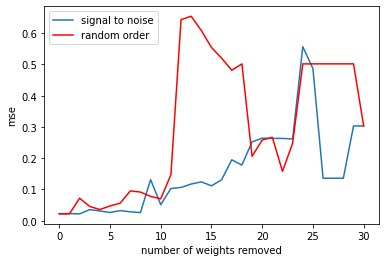

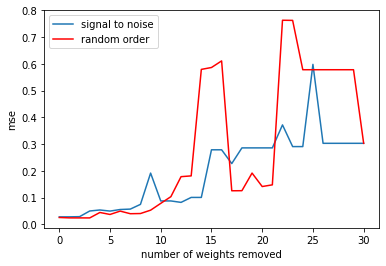

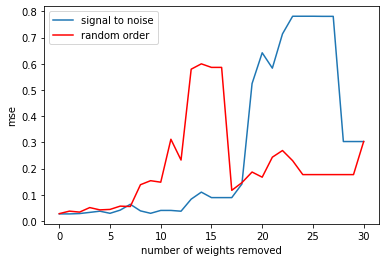

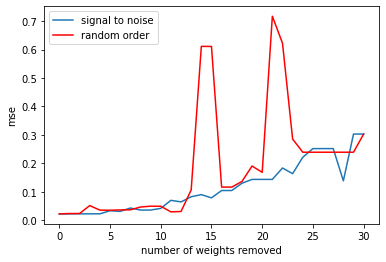

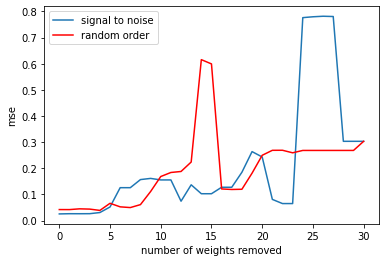

<Figure size 432x288 with 0 Axes>

In [33]:
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)
    
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        #sorted - setting weight to 0
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
        #unsorted - setting to 0
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = squared_error(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
        
    plt.plot(mse_list, label = "signal to noise")
    plt.plot(mse_list2, color = 'red', label = "random order")
    plt.legend(loc="upper left")
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    plt.savefig('result/' + name + "/snr" + str(count))
    plt.show()
    plt.clf()
    count = count + 1

No handles with labels found to put in legend.


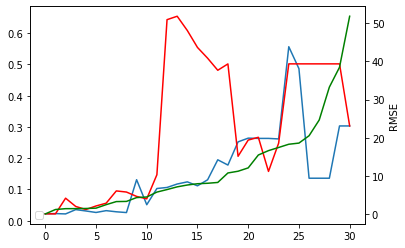

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

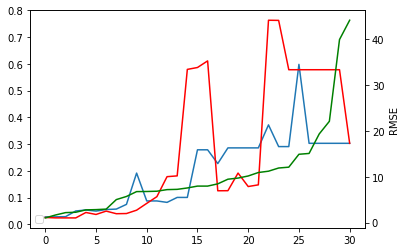

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

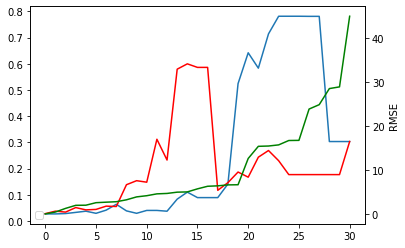

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

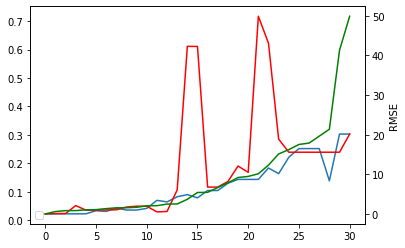

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

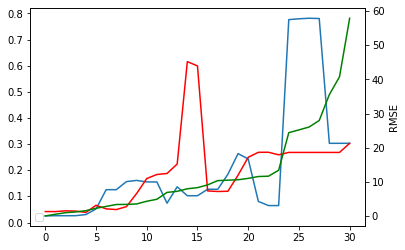

<Figure size 432x288 with 0 Axes>

In [75]:
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)
    
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        #sorted - setting weight to 0
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
        #unsorted - setting to 0
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = squared_error(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
    fig, ax = plt.subplots(1, 1)
    ax.plot(mse_list, label = "signal to noise")
    ax.plot(mse_list2, color = 'red', label = "random order")
    
    ax2 = ax.twinx()
    ax2.plot(np.sort(signal_to_noise), color = 'green')
    
    
    plt.legend(loc="lower left")
    # plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('RMSE')
    # plt.savefig('result/' + name + "/snr" + str(imgcount))
    plt.show()
    plt.clf()    
    
    count = count + 1

# Sunspot

In [8]:
name = "Sunspot"
traindata = np.loadtxt("data/Sunspot/train.txt")
testdata = np.loadtxt("data/Sunspot/test.txt") 

pos_run1 = np.loadtxt('result/' + name + '/pos_w_0.txt')  
pos_run2 = np.loadtxt('result/' + name + '/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/' + name + '/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/' + name + '/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/' + name + '/pos_w_4.txt') 
pos_weights = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

 0.0132,  0.0145,  0.0746, 0.147,  0.254
0.10748998521311165 1.3396630830241991 2.824229130021758 6.479622522953406 14.768546047885172


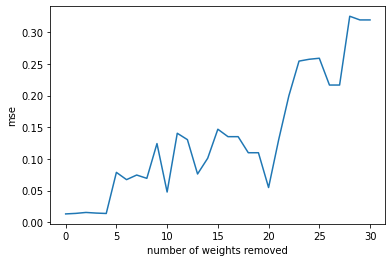

 0.014,  0.0397,  0.0543, 0.134,  0.284
0.9161304692702769 1.6631220456028148 3.1490058982234954 7.905757507066941 12.339393816210576


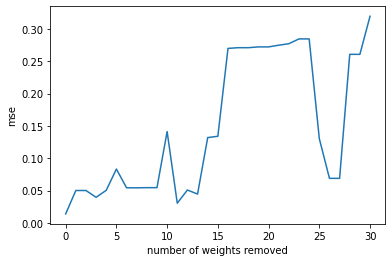

 0.0132,  0.0362,  0.0435, 0.136,  0.285
0.6153162409730254 1.0745731788241204 2.6623707111709702 8.39332905156995 14.259163430652343


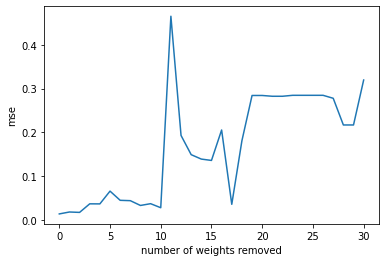

 0.0131,  0.0145,  0.0519, 0.18,  0.246
0.1766466939561286 1.4964898000115596 2.2833251172242477 7.718964093135038 11.586676667525417


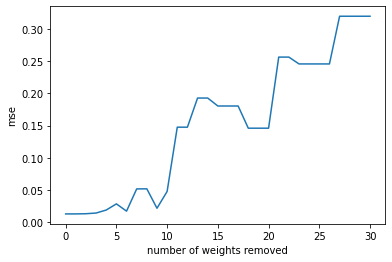

 0.015,  0.0776,  0.0564, 0.029,  0.268
0.013406537414329114 1.1007256038606208 4.081224300165654 8.221766980089177 14.465468572757857


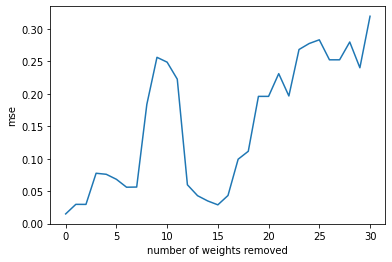

<Figure size 432x288 with 0 Axes>

In [17]:
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
    print(f"{mse_list[0] : .3g}, {mse_list[int(mse_list.shape[0] * 0.1)] : .3g}, {mse_list[int(mse_list.shape[0] * 0.25)] : .3g},{mse_list[int(mse_list.shape[0] * 0.5)] : .3g}, {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
        
    plt.plot(mse_list)
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    plt.show()
    plt.clf()

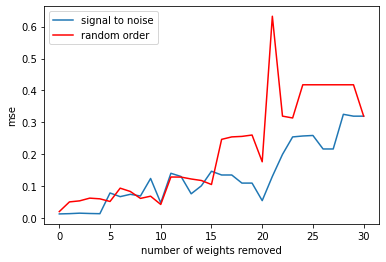

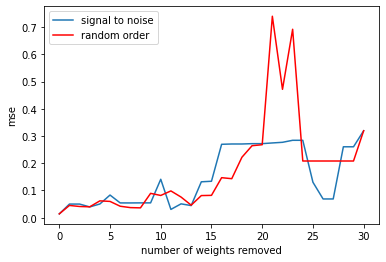

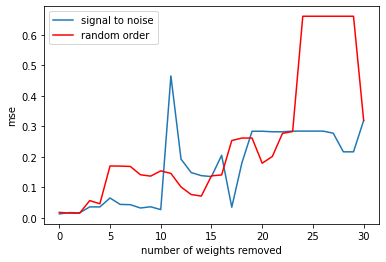

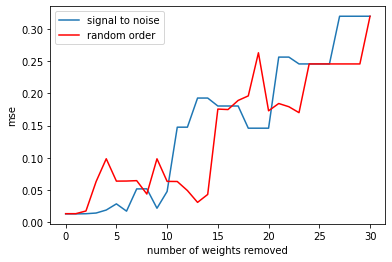

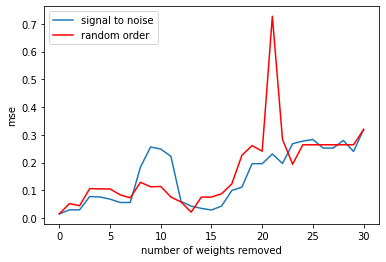

<Figure size 432x288 with 0 Axes>

In [35]:
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)
    
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        #sorted - setting weight to 0
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
        #unsorted - setting to 0
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = squared_error(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
        
    plt.plot(mse_list, label = "signal to noise")
    plt.plot(mse_list2, color = 'red', label = "random order")
    plt.legend(loc="upper left")
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    # plt.savefig('result/' + name + "/snr" + str(count))
    plt.show()
    plt.clf()
    count = count + 1

signal to noise: 
 0.0132 &  0.0145 &  0.0746 &  0.147 &  0.254
0.10748998521311165 1.3396630830241991 2.824229130021758 6.479622522953406 14.768546047885172
signal plus noise: 
 0.0132 &  0.0185 &  0.0197 &  0.0617 &  0.164
0.16484823248218936 0.41709504392294594 0.6124608185758891 1.241984516099339 2.308812482061528


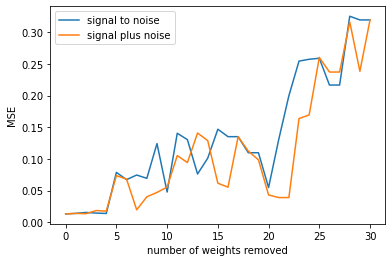

signal to noise: 
 0.014 &  0.0397 &  0.0543 &  0.134 &  0.284
0.9161304692702769 1.6631220456028148 3.1490058982234954 7.905757507066941 12.339393816210576
signal plus noise: 
 0.014 &  0.0828 &  0.0541 &  0.0834 &  0.265
0.23920072132998177 0.5257964791227284 0.8530420577106017 2.1937261904384484 3.7918063215205384


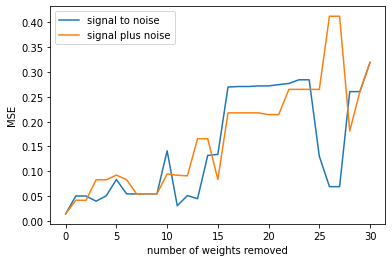

signal to noise: 
 0.0132 &  0.0362 &  0.0435 &  0.136 &  0.285
0.6153162409730254 1.0745731788241204 2.6623707111709702 8.39332905156995 14.259163430652343
signal plus noise: 
 0.0147 &  0.0284 &  0.0687 &  0.259 &  0.118
0.25939937204060953 0.31185479891415 0.8690544009969869 2.119354414445375 3.1424242504692006


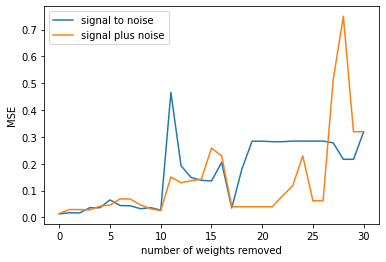

signal to noise: 
 0.0131 &  0.0145 &  0.0519 &  0.18 &  0.246
0.1766466939561286 1.4964898000115596 2.2833251172242477 7.718964093135038 11.586676667525417
signal plus noise: 
 0.0131 &  0.0458 &  0.141 &  0.258 &  0.585
0.1993830863705466 0.4627340515683157 0.7566017357069286 1.426134139938079 3.9936779178930233


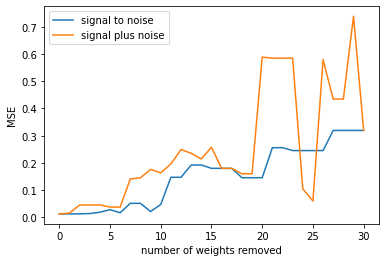

signal to noise: 
 0.015 &  0.0776 &  0.0564 &  0.029 &  0.268
0.013406537414329114 1.1007256038606208 4.081224300165654 8.221766980089177 14.465468572757857
signal plus noise: 
 0.015 &  0.0761 &  0.168 &  0.0334 &  0.262
0.22504346655054175 0.5248097159780778 0.9864870903717498 1.9182448985744718 3.749342573304399


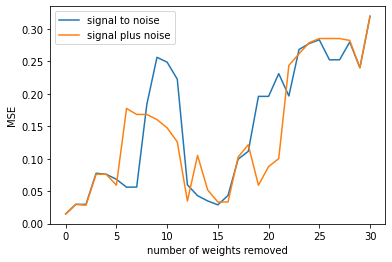

<Figure size 432x288 with 0 Axes>

In [9]:
def squared_error(prediction, actual):
    return (
        np.sqrt(np.sum(np.square(prediction - actual)) / prediction.shape[0])
    ) 
    
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])
    signal_plus_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
        signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])

    bnn_model = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    mse_list_spn = np.empty(signal_plus_noise.shape[0])
    
    sorted_index = np.argsort(signal_to_noise)
    sorted_index_spn = np.argsort(signal_plus_noise)
    
    new_pos = np.copy(w)
    new_pos_spn = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
        new_pos_spn[:, sorted_index_spn[j]] = 0
        
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
        mse_bnn_spn = squared_error(fx_spn, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)
        
        
    print('signal to noise: ')  
    print(f"{mse_list[0] : .3g} & {mse_list[int(mse_list.shape[0] * 0.1)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.25)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.5)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
          
    print('signal plus noise: ')
    print(f"{mse_list_spn[0] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_plus_noise, 0), 
          np.percentile(signal_plus_noise, 10), 
          np.percentile(signal_plus_noise, 25), 
          np.percentile(signal_plus_noise, 50),
          np.percentile(signal_plus_noise, 75))
    
    plt.plot(mse_list, label='signal to noise')
    plt.plot(mse_list_spn, label='signal plus noise')
    plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('MSE')
    plt.savefig('result/' + name + "/signal_plus" + str(count))
    plt.show()
    plt.clf()
    count = count + 1

# Abalone


In [10]:
data = np.genfromtxt('data/abalone/abalone.data',delimiter=',')
name = "abalone"

np.random.shuffle(data)
scaler = MinMaxScaler()
scaler.fit(data)
train_ratio = 0.8
traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]


pos_run1 = np.loadtxt('result/abalone/pos_w_0.txt')
pos_run2 = np.loadtxt('result/abalone/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/abalone/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/abalone/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/abalone/pos_w_4.txt') 

pos_weights = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

0.8


In [88]:
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([8, 12, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
    print(f"{mse_list[0] : .3g} & {mse_list[int(mse_list.shape[0] * 0.1)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.25)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.5)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
        
    plt.plot(mse_list)
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    plt.show()
    plt.clf()

ValueError: cannot reshape array of size 31 into shape (8,12)

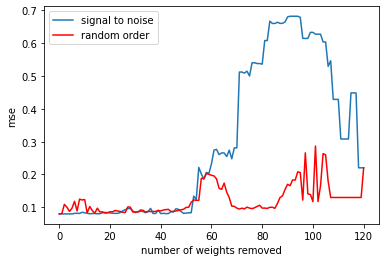

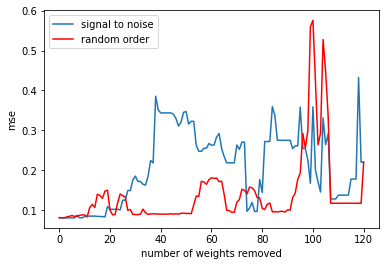

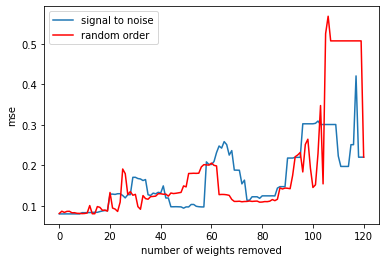

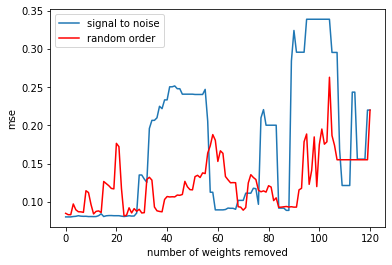

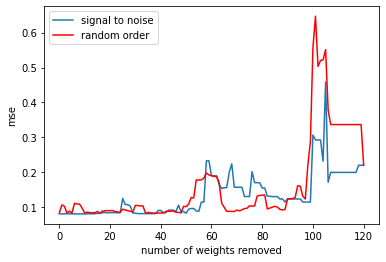

<Figure size 432x288 with 0 Axes>

In [48]:
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([8, 12, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)
    
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        #sorted - setting weight to 0
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
        #unsorted - setting to 0
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = squared_error(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
        
    plt.plot(mse_list, label = "signal to noise")
    plt.plot(mse_list2, color = 'red', label = "random order")
    plt.legend(loc="upper left")
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    plt.savefig('result/' + name + "/snr" + str(count))
    plt.show()
    plt.clf()
    count = count + 1

signal to noise: 
 0.0773 &  0.0776 &  0.0823 &  0.224 &  0.673
0.012248358680827326 1.9430602230379739 4.184981117123232 8.29850698530295 13.121514282549278
signal plus noise: 
 0.0773 &  0.0801 &  0.0788 &  0.22 &  0.148
0.06764238983325985 0.22911867798558 0.4739033579339562 0.8377251979645336 1.3609066396776692


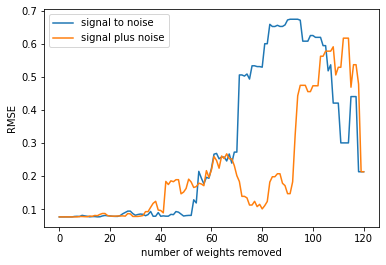

signal to noise: 
 0.0785 &  0.0831 &  0.187 &  0.261 &  0.271
0.0933622916476971 1.439774652572963 3.478145571443645 7.983851182403434 12.59440273357692
signal plus noise: 
 0.0785 &  0.0826 &  0.0809 &  0.146 &  0.131
0.10312643030950662 0.3096045744357574 0.5533415885487735 0.9754880024614254 1.5940433698210117


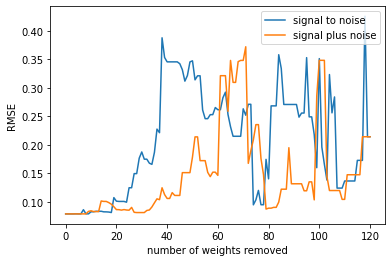

signal to noise: 
 0.078 &  0.081 &  0.166 &  0.206 &  0.224
0.2758399746033365 1.0303523529974397 2.97149757103126 6.116782903597289 13.16241757391093
signal plus noise: 
 0.0781 &  0.0797 &  0.0867 &  0.0978 &  0.519
0.10161497751922402 0.25883048442796336 0.4241894645277017 0.8319500677057894 1.510406602179528


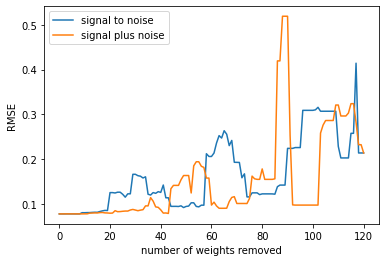

signal to noise: 
 0.0781 &  0.0785 &  0.135 &  0.0885 &  0.327
0.19387247371533295 1.7819150147292724 3.5227940900833437 7.318004565021097 13.757342809645138
signal plus noise: 
 0.0781 &  0.0796 &  0.0892 &  0.118 &  0.26
0.11503459815389047 0.27723485664060354 0.47810617862452753 0.9630464628509298 1.433652483344944


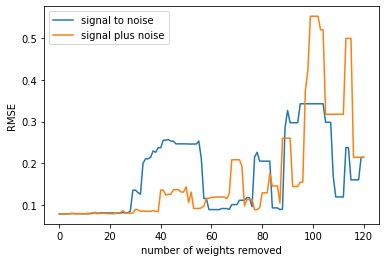

signal to noise: 
 0.0786 &  0.0788 &  0.0825 &  0.189 &  0.122
0.03604588162660755 1.074402874064198 3.198058694200487 6.833489277337711 13.32061662360806
signal plus noise: 
 0.0785 &  0.0787 &  0.126 &  0.138 &  0.106
0.09093788743165154 0.21223992199680625 0.5177904837459157 0.9186699558074218 1.518881092733642


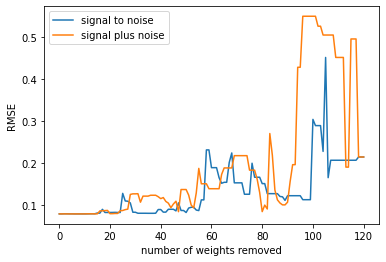

<Figure size 432x288 with 0 Axes>

In [11]:
def squared_error(prediction, actual):
    return (
        np.sqrt(np.sum(np.square(prediction - actual)) / prediction.shape[0])
    ) 
    
imgcount = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])
    signal_plus_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
        signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])

    bnn_model = Network([8, 12, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    mse_list_spn = np.empty(signal_plus_noise.shape[0])
    
    sorted_index = np.argsort(signal_to_noise)
    sorted_index_spn = np.argsort(signal_plus_noise)
    
    new_pos = np.copy(w)
    new_pos_spn = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
        new_pos_spn[:, sorted_index_spn[j]] = 0
        
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
        mse_bnn_spn = squared_error(fx_spn, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)
        
    print('signal to noise: ')  
    print(f"{mse_list[0] : .3g} & {mse_list[int(mse_list.shape[0] * 0.1)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.25)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.5)] : .3g} & {mse_list[int(mse_list.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
          
    print('signal plus noise: ')
    print(f"{mse_list_spn[0] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .3g} & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .3g}")
    print(np.percentile(signal_plus_noise, 0), 
          np.percentile(signal_plus_noise, 10), 
          np.percentile(signal_plus_noise, 25), 
          np.percentile(signal_plus_noise, 50),
          np.percentile(signal_plus_noise, 75))
    
    plt.plot(mse_list, label='signal to noise')
    plt.plot(mse_list_spn, label='signal plus noise')
    plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('RMSE')
    # plt.savefig('result/' + name + "/signal_plus" + str(imgcount))
    plt.show()
    plt.clf()
    imgcount = imgcount + 1

# Iris

In [5]:
data  = np.genfromtxt('data/iris.csv',delimiter=';')
np.random.seed(123)
np.random.shuffle(data)
classes = data[:,4].reshape(data.shape[0],1)-1
features = data[:,0:4] #Normalizing Data

for k in range(4):
    mean = np.mean(features[:,k])
    dev = np.std(features[:,k])
    features[:,k] = (features[:,k]-mean)/dev
    train_ratio = 0.7 #choose
    indices = np.random.permutation(features.shape[0])
    traindata = np.hstack([features[indices[:np.int(train_ratio*features.shape[0])],:],classes[indices[:np.int(train_ratio*features.shape[0])],:]])
    testdata = np.hstack([features[indices[np.int(train_ratio*features.shape[0])]:,:],classes[indices[np.int(train_ratio*features.shape[0])]:,:]])
    activation = True

name = "Iris"
pos_run1 = np.loadtxt('result/' + name + '/pos_w_0.txt')  
pos_run2 = np.loadtxt('result/' + name + '/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/' + name + '/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/' + name + '/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/' + name + '/pos_w_4.txt') 
pos_weights = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

In [5]:
count = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([8, 12, 1], traindata, testdata, 0.01, 'regression')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)
    
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        #sorted - setting weight to 0
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = squared_error(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
        #unsorted - setting to 0
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = squared_error(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
        
    plt.plot(mse_list, label = "signal to noise")
    plt.plot(mse_list2, color = 'red', label = "random order")
    plt.legend(loc="upper left")
    plt.xlabel('number of weights removed')
    plt.ylabel('mse')
    plt.savefig('result/' + name + "/snr" + str(count))
    plt.show()
    plt.clf()
    count = count + 1

(25000, 99)


 98.39,  98.39,  95.16, 95.16,  29.03
0.09538254351894423 0.4352124659577025 1.004486775545263 2.1338690332202357 4.079292807194468


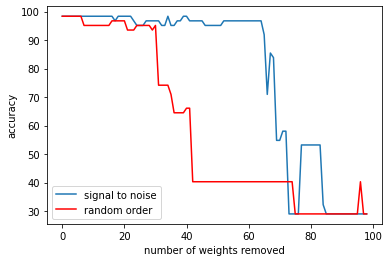

 98.39,  98.39,  98.39, 96.77,  96.77
0.10638814900322646 0.41775830799087765 1.1467156169175101 2.1596462673308015 4.547003546093595


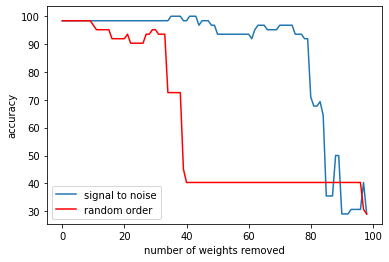

 98.39,  98.39,  98.39, 93.55,  64.52
0.0017728091734104969 0.5051680291119646 1.0690941381688859 2.1699758742823776 4.075838834555204


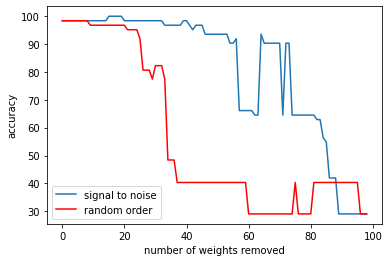

 100.00,  100.00,  100.00, 91.94,  25.81
0.07502599506186279 0.3162178374284231 1.1340088864708964 2.5145812428467162 4.837850765086573


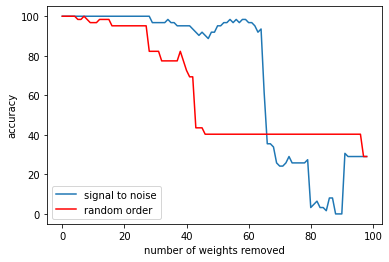

 98.39,  98.39,  96.77, 96.77,  91.94
0.05115153104736897 0.7020758837906247 1.2477992149709582 2.144367602074287 3.3299318133814664


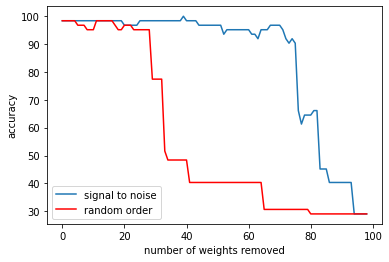

<Figure size 432x288 with 0 Axes>

In [53]:
imgcount=1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 12, 3], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)
    
    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
    
        
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = accuracy(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
    print(f"{mse_list[0] : .2f}, {mse_list[int(mse_list.shape[0] * 0.1)] : .2f}, {mse_list[int(mse_list.shape[0] * 0.25)] : .2f},{mse_list[int(mse_list.shape[0] * 0.5)] : .2f}, {mse_list[int(mse_list.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
        
    plt.plot(mse_list, label = "signal to noise")
    plt.plot(mse_list2, color = 'red', label = "random order")
    plt.legend(loc="lower left")
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    plt.savefig('result/' + name + "/snr" + str(imgcount))
    imgcount=imgcount+1
    plt.show()
    plt.clf()

signal to noise: 
 98.39\% &  98.39\% &  95.16\% & 95.16\% &  29.03
0.09538254351894423 0.4352124659577025 1.004486775545263 2.1338690332202357 4.079292807194468
signal plus noise: 
 98.39\% &  95.16\% &  95.16\% & 90.32\% &  29.03
0.9296052681856339 1.7088652063787604 2.4107403847237454 3.7495069315867213 5.614256854961668


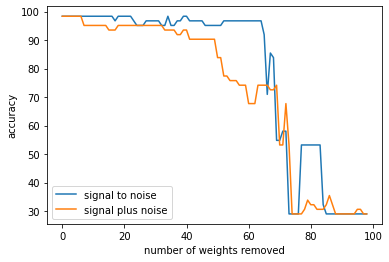

signal to noise: 
 98.39\% &  98.39\% &  98.39\% & 96.77\% &  96.77
0.10638814900322646 0.41775830799087765 1.1467156169175101 2.1596462673308015 4.547003546093595
signal plus noise: 
 98.39\% &  96.77\% &  93.55\% & 91.94\% &  72.58
0.9463440519409986 1.696890196863461 2.520352514186082 3.907748123993332 6.22132146219769


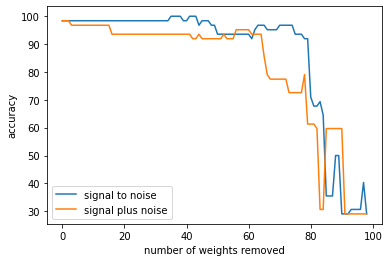

signal to noise: 
 98.39\% &  98.39\% &  98.39\% & 93.55\% &  64.52
0.0017728091734104969 0.5051680291119646 1.0690941381688859 2.1699758742823776 4.075838834555204
signal plus noise: 
 98.39\% &  95.16\% &  95.16\% & 91.94\% &  88.71
0.7776640545266273 1.8598157371583612 2.2113517591252814 3.865663396890597 6.933499959029778


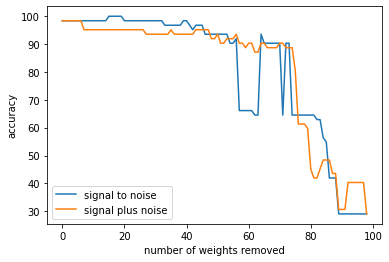

signal to noise: 
 100.00\% &  100.00\% &  100.00\% & 91.94\% &  25.81
0.07502599506186279 0.3162178374284231 1.1340088864708964 2.5145812428467162 4.837850765086573
signal plus noise: 
 100.00\% &  98.39\% &  96.77\% & 91.94\% &  30.65
0.7520911216587521 1.5885535982966723 2.599266423131966 4.254949481443401 6.722835106039843


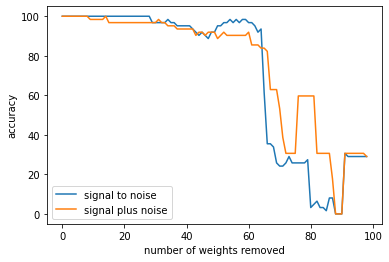

signal to noise: 
 98.39\% &  98.39\% &  96.77\% & 96.77\% &  91.94
0.05115153104736897 0.7020758837906247 1.2477992149709582 2.144367602074287 3.3299318133814664
signal plus noise: 
 98.39\% &  96.77\% &  96.77\% & 91.94\% &  67.74
0.8429650995859229 1.8454521079388706 2.5108820593480488 3.3232483434674847 5.344116900086616


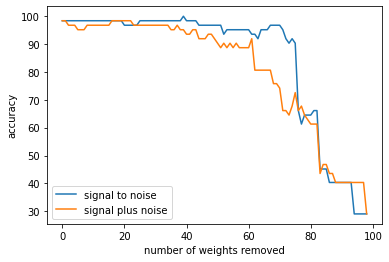

<Figure size 432x288 with 0 Axes>

In [16]:
imgcount = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])
    signal_plus_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
        signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])

    bnn_model = Network([4, 12, 3], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    mse_list_spn = np.empty(signal_plus_noise.shape[0])
    
    sorted_index = np.argsort(signal_to_noise)
    sorted_index_spn = np.argsort(signal_plus_noise)
    
    new_pos = np.copy(w)
    new_pos_spn = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
        new_pos_spn[:, sorted_index_spn[j]] = 0
        
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
        mse_bnn_spn = accuracy(fx_spn, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)
        
    print('signal to noise: ')  
    print(f"{mse_list[0] : .2f}\% & {mse_list[int(mse_list.shape[0] * 0.1)] : .2f}\% & {mse_list[int(mse_list.shape[0] * 0.25)] : .2f}\% &{mse_list[int(mse_list.shape[0] * 0.5)] : .2f}\% & {mse_list[int(mse_list.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
          
    print('signal plus noise: ')
    print(f"{mse_list_spn[0] : .2f}\% & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .2f}\% & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .2f}\% &{mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .2f}\% & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_plus_noise, 0), 
          np.percentile(signal_plus_noise, 10), 
          np.percentile(signal_plus_noise, 25), 
          np.percentile(signal_plus_noise, 50),
          np.percentile(signal_plus_noise, 75))
    
    plt.plot(mse_list, label='signal to noise')
    plt.plot(mse_list_spn, label='signal plus noise')
    plt.legend()
    plt.savefig('result/' + name + "/signal_plus" + str(imgcount))
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    plt.show()
    plt.clf()
    imgcount = imgcount + 1

No handles with labels found to put in legend.


 98.39,  98.39,  95.16, 95.16,  29.03
0.09538254351894423 0.4352124659577025 1.004486775545263 2.1338690332202357 4.079292807194468


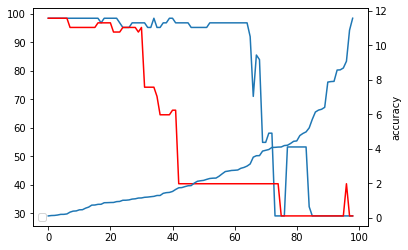

No handles with labels found to put in legend.


 98.39,  98.39,  98.39, 96.77,  96.77
0.10638814900322646 0.41775830799087765 1.1467156169175101 2.1596462673308015 4.547003546093595


<Figure size 432x288 with 0 Axes>

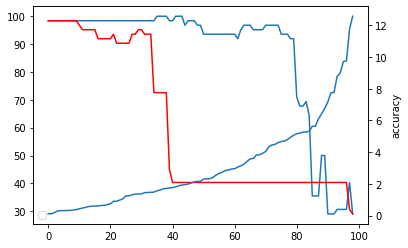

No handles with labels found to put in legend.


 98.39,  98.39,  98.39, 93.55,  64.52
0.0017728091734104969 0.5051680291119646 1.0690941381688859 2.1699758742823776 4.075838834555204


<Figure size 432x288 with 0 Axes>

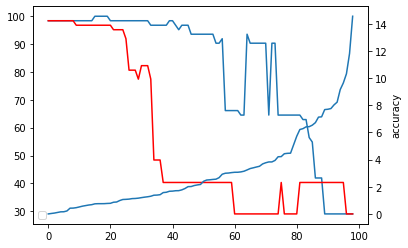

No handles with labels found to put in legend.


 100.00,  100.00,  100.00, 91.94,  25.81
0.07502599506186279 0.3162178374284231 1.1340088864708964 2.5145812428467162 4.837850765086573


<Figure size 432x288 with 0 Axes>

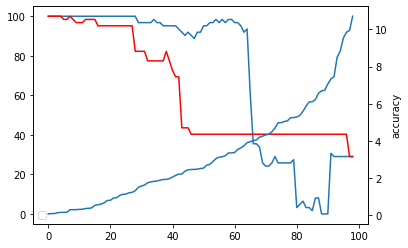

No handles with labels found to put in legend.


 98.39,  98.39,  96.77, 96.77,  91.94
0.05115153104736897 0.7020758837906247 1.2477992149709582 2.144367602074287 3.3299318133814664


<Figure size 432x288 with 0 Axes>

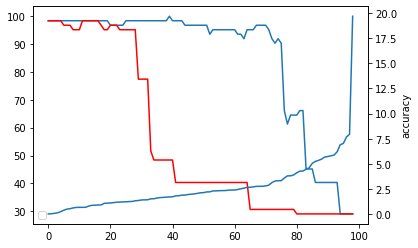

<Figure size 432x288 with 0 Axes>

In [71]:
imgcount=1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([4, 12, 3], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)
    
    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
    
        
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = accuracy(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
    print(f"{mse_list[0] : .2f}, {mse_list[int(mse_list.shape[0] * 0.1)] : .2f}, {mse_list[int(mse_list.shape[0] * 0.25)] : .2f},{mse_list[int(mse_list.shape[0] * 0.5)] : .2f}, {mse_list[int(mse_list.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
        
    fig, ax = plt.subplots(1, 1)
    ax.plot(mse_list, label = "signal to noise")
    ax.plot(mse_list2, color = 'red', label = "random order")
    
    ax2 = ax.twinx()
    ax2.plot(np.sort(signal_to_noise))
    
    
    plt.legend(loc="lower left")
    # plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    # plt.savefig('result/' + name + "/snr" + str(imgcount))
    imgcount=imgcount+1
    plt.show()
    plt.clf()

# Ionosphere

In [12]:
name = 'Ionosphere'
traindata = np.genfromtxt('data/ionesphere/ftrain.csv',delimiter=',')[:,:-1]
testdata = np.genfromtxt('data/ionesphere/ftest.csv',delimiter=',')[:,:-1]

pos_run1 = np.loadtxt('result/' + name + '/pos_w_0.txt')  
pos_run2 = np.loadtxt('result/' + name + '/pos_w_1.txt')  
pos_run3 = np.loadtxt('result/' + name + '/pos_w_2.txt')  
pos_run4 = np.loadtxt('result/' + name + '/pos_w_3.txt')  
pos_run5 = np.loadtxt('result/' + name + '/pos_w_4.txt') 
pos_weights = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

 95.41,  95.41,  96.33, 66.06,  22.02
0.0005106411260476903 0.39889787858629966 1.0843875833558347 2.24368092543083 4.039811218723117


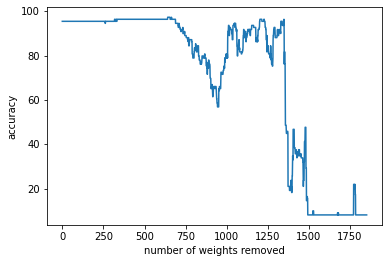

 93.58,  93.58,  94.50, 85.32,  74.31
0.002062117362322161 0.42655032337207005 1.0742195623852424 2.330786710328042 3.9546348186422704


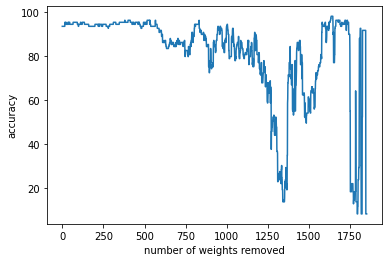

 95.41,  94.50,  88.99, 71.56,  59.63
0.003217943365083239 0.44890638596406274 1.1053841240233384 2.357607690216685 4.159369649621036


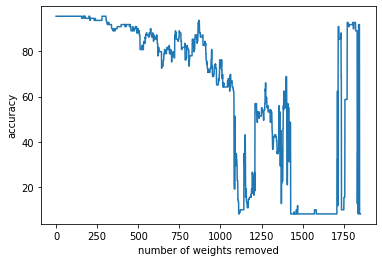

 92.66,  90.83,  96.33, 95.41,  74.31
0.000352140617610085 0.5041149079739973 1.1947195467934886 2.390525479174932 4.300103494485854


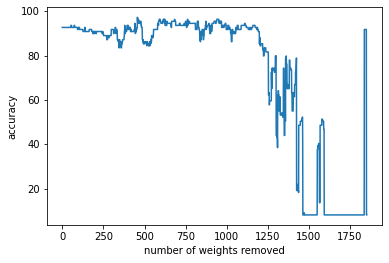

 91.74,  90.83,  93.58, 92.66,  61.47
0.0027212606040309915 0.4325744357930394 1.1120873589090792 2.4779891964543674 4.385261417531039


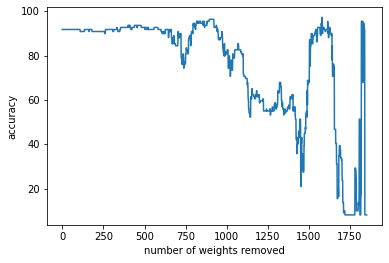

<Figure size 432x288 with 0 Axes>

In [13]:
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([34, 50, 2], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
        
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        
    print(f"{mse_list[0] : .2f}, {mse_list[int(mse_list.shape[0] * 0.1)] : .2f}, {mse_list[int(mse_list.shape[0] * 0.25)] : .2f},{mse_list[int(mse_list.shape[0] * 0.5)] : .2f}, {mse_list[int(mse_list.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
    
    plt.plot(mse_list)
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    plt.show()
    plt.clf()

signal to noise: 
 95.41\% &  95.41\% &  96.33\% & 66.06\% &  22.02
0.0005106411260476903 0.39889787858629966 1.0843875833558347 2.24368092543083 4.039811218723117
signal plus noise: 
 95.41\% &  95.41\% &  97.25\% & 89.91\% &  8.26
0.2208351149673515 0.8651799499992882 1.2352898198863427 1.9678856463677934 3.0103556277126753


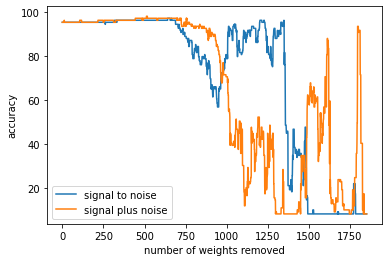

signal to noise: 
 93.58\% &  93.58\% &  94.50\% & 85.32\% &  74.31
0.002062117362322161 0.42655032337207005 1.0742195623852424 2.330786710328042 3.9546348186422704
signal plus noise: 
 93.58\% &  93.58\% &  88.07\% & 86.24\% &  61.47
0.2698816312275969 0.862286201817422 1.2790923981984055 2.036790715023028 3.0732017013080712


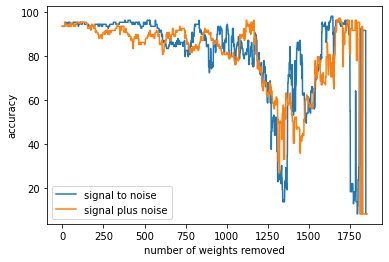

signal to noise: 
 95.41\% &  94.50\% &  88.99\% & 71.56\% &  59.63
0.003217943365083239 0.44890638596406274 1.1053841240233384 2.357607690216685 4.159369649621036
signal plus noise: 
 95.41\% &  95.41\% &  95.41\% & 66.97\% &  56.88
0.2349288070664806 0.8436700987836417 1.282715243460192 2.0432747962593316 2.9846897129816634


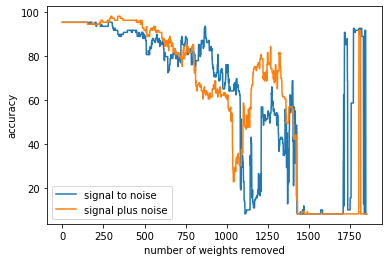

signal to noise: 
 92.66\% &  90.83\% &  96.33\% & 95.41\% &  74.31
0.000352140617610085 0.5041149079739973 1.1947195467934886 2.390525479174932 4.300103494485854
signal plus noise: 
 92.66\% &  89.91\% &  90.83\% & 86.24\% &  8.26
0.27113834358774747 0.8508775211141624 1.2643211611115461 2.0311174094157094 3.046041383941297


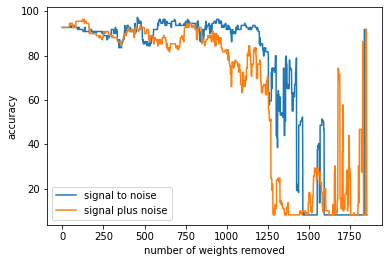

signal to noise: 
 91.74\% &  90.83\% &  93.58\% & 92.66\% &  61.47
0.0027212606040309915 0.4325744357930394 1.1120873589090792 2.4779891964543674 4.385261417531039
signal plus noise: 
 91.74\% &  94.50\% &  94.50\% & 87.16\% &  88.07
0.319844875700198 0.845691277778151 1.2694921479185213 2.088025709929451 3.097434940123863


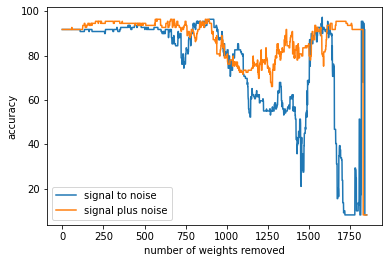

<Figure size 432x288 with 0 Axes>

In [14]:
imgcount = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])
    signal_plus_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])
        signal_plus_noise[i] = np.absolute(np.mean(w[:, i])) + np.std(w[:, i])

    bnn_model = Network([34, 50, 2], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    mse_list_spn = np.empty(signal_plus_noise.shape[0])
    
    sorted_index = np.argsort(signal_to_noise)
    sorted_index_spn = np.argsort(signal_plus_noise)
    
    new_pos = np.copy(w)
    new_pos_spn = np.copy(w)

    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
        new_pos_spn[:, sorted_index_spn[j]] = 0
        
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, new_pos_spn.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
        mse_bnn_spn = accuracy(fx_spn, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
        mse_list_spn[j] = round(np.mean(mse_bnn_spn), 10)
        
    print('signal to noise: ')  
    print(f"{mse_list[0] : .2f}\% & {mse_list[int(mse_list.shape[0] * 0.1)] : .2f}\% & {mse_list[int(mse_list.shape[0] * 0.25)] : .2f}\% &{mse_list[int(mse_list.shape[0] * 0.5)] : .2f}\% & {mse_list[int(mse_list.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_to_noise, 0), 
          np.percentile(signal_to_noise, 10), 
          np.percentile(signal_to_noise, 25), 
          np.percentile(signal_to_noise, 50),
          np.percentile(signal_to_noise, 75))
          
    print('signal plus noise: ')
    print(f"{mse_list_spn[0] : .2f}\% & {mse_list_spn[int(mse_list_spn.shape[0] * 0.1)] : .2f}\% & {mse_list_spn[int(mse_list_spn.shape[0] * 0.25)] : .2f}\% &{mse_list_spn[int(mse_list_spn.shape[0] * 0.5)] : .2f}\% & {mse_list_spn[int(mse_list_spn.shape[0] * 0.75)] : .2f}")
    print(np.percentile(signal_plus_noise, 0), 
          np.percentile(signal_plus_noise, 10), 
          np.percentile(signal_plus_noise, 25), 
          np.percentile(signal_plus_noise, 50),
          np.percentile(signal_plus_noise, 75))
    
    plt.plot(mse_list, label='signal to noise')
    plt.plot(mse_list_spn, label='signal plus noise')
    plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    # plt.savefig('result/' + name + "/signal_plus" + str(imgcount))
    imgcount = imgcount + 1
    plt.show()
    plt.clf()

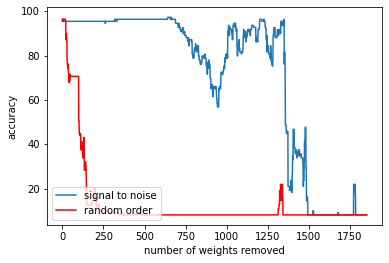

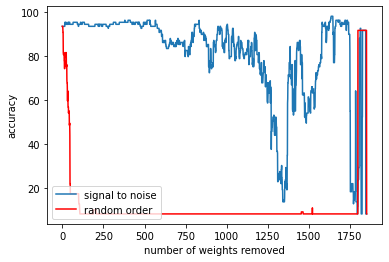

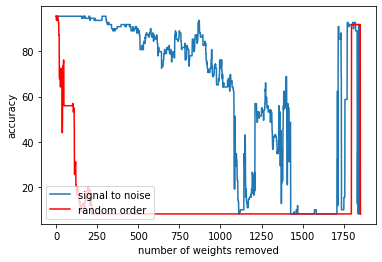

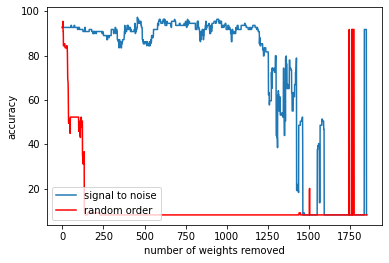

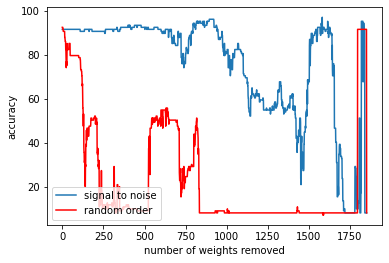

<Figure size 432x288 with 0 Axes>

In [60]:
### removing in order of SNR vs. removing in order of weights

imgcount = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([34, 50, 2], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

        
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)
    
    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
    
        
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = accuracy(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
    plt.plot(mse_list, label = "signal to noise")
    plt.plot(mse_list2, color = 'red', label = "random order")
    
    
    
    plt.legend(loc="lower left")
    # plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    plt.savefig('result/' + name + "/snr" + str(imgcount))
    imgcount=imgcount+1
    plt.show()
    
    plt.clf()

No handles with labels found to put in legend.


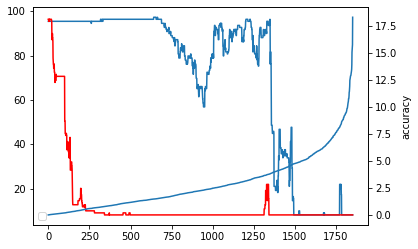

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

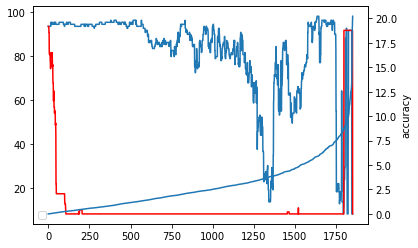

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

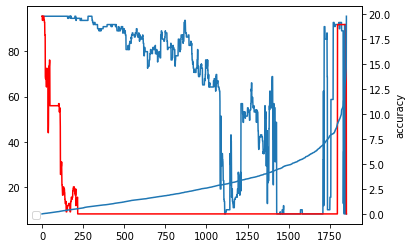

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

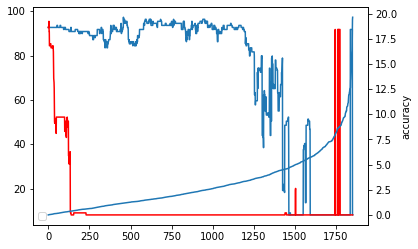

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

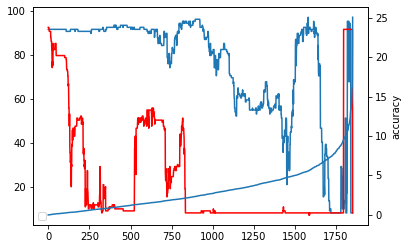

<Figure size 432x288 with 0 Axes>

In [69]:
### removing in order of SNR vs. removing in order of weights

imgcount = 1
for w in pos_weights:
    
    signal_to_noise = np.empty(w.shape[1])

    for i in range(w.shape[1]):
        signal_to_noise[i] = np.absolute(np.mean(w[:, i])) / np.std(w[:, i])

    bnn_model = Network([34, 50, 2], traindata, testdata, 0.01, 'classification')
    mse_bnn = np.empty(w.shape[0])
    
    mse_list = np.empty(signal_to_noise.shape[0])
    sorted_index = np.argsort(signal_to_noise)
    new_pos = np.copy(w)

        
    mse_list2 = np.empty(signal_to_noise.shape[0])
    new_pos2 = np.copy(w)
    
    for j in range(sorted_index.shape[0]):
        mse_bnn = np.empty(w.shape[0])
        new_pos[:, sorted_index[j]] = 0
#         print(sorted_index[j], new_pos[12])
#         for i in range(w.shape[0]):
        fx, prob = bnn_model.evaluate_proposal(testdata, new_pos.mean(axis=0))
        mse_bnn = accuracy(fx, testdata[:, -1])
#         print('bnn mse: ', round(np.mean(mse_bnn), 10))
        mse_list[j] = round(np.mean(mse_bnn), 10)
    
        
        new_pos2[:, j] = 0
        fx2, prob2 = bnn_model.evaluate_proposal(testdata, new_pos2.mean(axis=0))
        mse_bnn2 = accuracy(fx2, testdata[:, -1])
        mse_list2[j] = round(np.mean(mse_bnn2), 10)
        
        
    fig, ax = plt.subplots(1, 1)
    ax.plot(mse_list, label = "signal to noise")
    ax.plot(mse_list2, color = 'red', label = "random order")
    
    ax2 = ax.twinx()
    ax2.plot(np.sort(signal_to_noise))
    
    
    plt.legend(loc="lower left")
    # plt.legend()
    plt.xlabel('number of weights removed')
    plt.ylabel('accuracy')
    # plt.savefig('result/' + name + "/snr" + str(imgcount))
    imgcount=imgcount+1
    plt.show()
    plt.clf()



array([3.21794337e-03, 1.06800282e-02, 1.08017760e-02, ...,
       1.45610390e+01, 1.46258592e+01, 1.97659867e+01])

# result
---
## signal to noise ratio
* MSE / accuracy are based on testing set.
* weights are pruned by setting them to zero

|  Problem                      | # weights | Error/Accuracy <br /> (full model) | Error/Accuracy <br /> (10% pruned)   | Error/Accuracy <br /> (25% pruned) | Error/Accuracy <br /> (50% pruned) | Error/Accuracy <br /> (75% pruned)
| :---:                         | :---: | :---:                          |   :---:       | :---: |  :---: | :---: |
| Lazer (regression)            |  31  | 0.000492 <br /> 0.000796 <br /> 0.000721 <br /> 0.000521 <br /> 0.000647| 0.00127 <br /> 0.00253 <br /> 0.00106 <br /> 0.000535 <br /> 0.000694 | 0.000817 <br /> 0.00329 <br /> 0.00403 <br /> 0.00189 <br /> 0.0158 | 0.0125 <br /> 0.0778 <br /> 0.00793 <br /> 0.00627 <br /> 0.0105 | 0.0685 <br /> 0.0847 <br /> 0.611 <br /> 0.0269 <br /> 0.00423 
| Sunspot (regression)          |  31  | 0.000174 <br /> 0.000195 <br /> 0.000173 <br /> 0.000172 <br /> 0.000225 | 0.000211 <br /> 0.00157 <br /> 0.00131 <br /> 0.00021 <br /> 0.00603 | 0.00556 <br /> 0.00295 <br /> 0.00189 <br /> 0.00269 <br /> 0.00318 | 0.0216 <br /> 0.0179 <br /> 0.0184 <br /> 0.0325 <br /> 0.000841 | 0.0648 <br /> 0.0809 <br /> 0.081 <br /> 0.0603 <br /> 0.072
| Iris (classification)         |  99  | 98.41% <br /> 98.41% <br /> 98.41 % <br /> 99.21% <br /> 97.62% | 98.41% <br /> 98.41% <br /> 97.62% <br /> 99.21% <br /> 98.41%  | 97.62% <br /> 97.62% <br /> 97.62% <br /> 99.21% <br /> 97.62% | 96.83% <br /> 98.41% <br /> 98.41% <br /> 96.83% <br /> 98.41% | 37.3% <br /> 98.41% <br /> 58.73% <br /> 27.78% <br /> 94.44%|
| Ionosphere (classification)   | 1852 | 95.41% <br /> 93.58% <br /> 95.41% <br /> 92.66% <br /> 91.74%| 95.41% <br /> 93.58% <br /> 94.5% <br /> 90.83% <br /> 90.83% | 96.33% <br /> 94.5% <br /> 88.99% <br /> 96.33% <br /> 93.58% | 66.06% <br /> 85.32% <br /> 71.56% <br /> 95.41% <br /> 92.66% | 22.02% <br /> 74.31% <br /> 59.63% <br /> 74.31% <br /> 61.47%|


## signal plus noise ratio
|  Problem                      | # weights | Error/Accuracy <br /> (full model) | Error/Accuracy <br /> (10% pruned)   | Error/Accuracy <br /> (25% pruned) | Error/Accuracy <br /> (50% pruned) | Error/Accuracy <br /> (75% pruned)
| :---:                         | :---: | :---:                          |   :---:       | :---: |  :---: | :---: |
| Lazer (regression)            |  31  | 0.000492 <br /> 0.000796 <br /> 0.000721 <br /> 0.000521 <br /> 0.000647|
| Sunspot (regression)          |  31  | 0.000174 <br /> 0.000195 <br /> 0.000173 <br /> 0.000172 <br /> 0.000225 | 
| Iris (classification)         |  99  | 98.41% <br /> 98.41% <br /> 98.41 % <br /> 99.21% <br /> 97.62% | 
| Ionosphere (classification)   | 1852 | 95.41% <br /> 93.58% <br /> 95.41% <br /> 92.66% <br /> 91.74%| 95.41% <br /> 93.58% <br /> 95.41% <br /> 89.91% <br /> 94.5% | 97.25% <br /> 88.07% <br /> 95.41% <br /> 90.83% <br /> 94.5% | 89.91% <br /> 86.24% <br /> 66.97% <br /> 86.24% <br /> 87.16% | 8.26% <br /> 61.47% <br /> 56.88% <br /> 8.26% <br /> 88.07%|